In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('customer.txt', sep=",", engine='python')
data.head()

,customer_id,customer_contact_acquisition_date,household_has_dillards_credit_card,household_distance_to_nearest_store
0,223824501,11/3/2017,N,?
1,225074975,2/17/2018,Y,?
2,225962452,5/15/2018,N,?
3,224503675,12/23/2017,N,?
4,204405913,9/19/2013,N,4.708


In [2]:
from datetime import datetime,timedelta
from datetime import date, datetime


data['diff_customer_contact_acquisition_date'] =  (datetime.strptime('07/30/2018',"%m/%d/%Y")-pd.to_datetime(data['customer_contact_acquisition_date'],format ="%m/%d/%Y")).dt.days


data.head()

,customer_id,customer_contact_acquisition_date,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date
0,223824501,11/3/2017,N,?,269
1,225074975,2/17/2018,Y,?,163
2,225962452,5/15/2018,N,?,76
3,224503675,12/23/2017,N,?,219
4,204405913,9/19/2013,N,4.708,1775


In [3]:
data.count()

customer_id                               25000
customer_contact_acquisition_date         25000
household_has_dillards_credit_card        25000
household_distance_to_nearest_store       25000
diff_customer_contact_acquisition_date    25000
dtype: int64

In [4]:
print(data['household_distance_to_nearest_store'].value_counts())

?          7527
0.000        13
0.049        10
5.388         7
2.210         7
           ... 
9.052         1
22.838        1
30.226        1
57.540        1
277.549       1
Name: household_distance_to_nearest_store, Length: 12969, dtype: int64


In [5]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
customer_id,0,0.0
customer_contact_acquisition_date,0,0.0
household_has_dillards_credit_card,0,0.0
household_distance_to_nearest_store,0,0.0
diff_customer_contact_acquisition_date,0,0.0


In [6]:
data1 = pd.read_csv('store_location.txt', sep=",", engine='python')
data1.head()

,store_location_id,address1,address2,city,state,zip_code
0,2957,SAN ANGELO,4001 SUNSET DRIVE,SAN ANGELO,TX,76904
1,2924,DENTON,2201 S I-35 E,DENTON,TX,76205
2,2722,OXFORD,700 QUINTARD DR,OXFORD,AL,36203
3,2809,FAYETTEVILLE,4201 N SHILOH,FAYETTEVILLE,AR,72703
4,2759,MANHATTAN,102 MANHATTAN TOWN CENTER,MANHATTAN,KS,66502


In [7]:
data1.count()

store_location_id    271
address1             271
address2             271
city                 271
state                271
zip_code             271
dtype: int64

In [8]:
data2 = pd.read_csv('customer_subscription_status.txt', sep=",", engine='python')
data2.head()

,customer_id,unsubscribed_yn
0,223824501,N
1,225074975,N
2,225962452,N
3,224503675,N
4,204405913,N


In [9]:
data2.count()

customer_id        25000
unsubscribed_yn    25000
dtype: int64

In [10]:
#data2.nunique().count()
data2['unsubscribed_yn'].value_counts()

N    20000
Y     5000
Name: unsubscribed_yn, dtype: int64

In [11]:
d_data12 =data.merge(data2, how='left', on='customer_id')
d_data12.head()

,customer_id,customer_contact_acquisition_date,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date,unsubscribed_yn
0,223824501,11/3/2017,N,?,269,N
1,225074975,2/17/2018,Y,?,163,N
2,225962452,5/15/2018,N,?,76,N
3,224503675,12/23/2017,N,?,219,N
4,204405913,9/19/2013,N,4.708,1775,N


In [12]:
data3 = pd.read_csv('customer_email_campaign_agg.txt', sep=",", engine='python')
data3.head()

,customer_id,total_email_sent_count,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,last_email_open_date,last_email_click_date
0,225440671,55,16,0,41,12,0,3,1,0,7/1/2018,?
1,226090744,29,3,1,24,1,0,2,1,1,6/29/2018,6/28/2018
2,180891722,24,0,0,17,0,0,3,0,0,?,?
3,166847570,22,0,0,15,0,0,2,0,0,?,?
4,195739838,2,1,0,1,0,0,1,1,0,6/27/2018,?


In [13]:
data3['last_email_open_date']=data3['last_email_open_date'].replace(to_replace = '?', value ='7/30/2018')
data3.last_email_click_date=data3.last_email_click_date.replace(to_replace = '?', value ='7/30/2018')
data3.head()

,customer_id,total_email_sent_count,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,last_email_open_date,last_email_click_date
0,225440671,55,16,0,41,12,0,3,1,0,7/1/2018,7/30/2018
1,226090744,29,3,1,24,1,0,2,1,1,6/29/2018,6/28/2018
2,180891722,24,0,0,17,0,0,3,0,0,7/30/2018,7/30/2018
3,166847570,22,0,0,15,0,0,2,0,0,7/30/2018,7/30/2018
4,195739838,2,1,0,1,0,0,1,1,0,6/27/2018,7/30/2018


In [14]:
data3['diff_last_email_open_date'] =  (datetime.strptime('07/30/2018',"%m/%d/%Y")-pd.to_datetime(data3['last_email_open_date'],format ="%m/%d/%Y")).dt.days
data3['diff_last_email_click_date'] =  (datetime.strptime('07/30/2018',"%m/%d/%Y")-pd.to_datetime(data3['last_email_click_date'],format ="%m/%d/%Y")).dt.days

data3.head()

,customer_id,total_email_sent_count,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,last_email_open_date,last_email_click_date,diff_last_email_open_date,diff_last_email_click_date
0,225440671,55,16,0,41,12,0,3,1,0,7/1/2018,7/30/2018,29,0
1,226090744,29,3,1,24,1,0,2,1,1,6/29/2018,6/28/2018,31,32
2,180891722,24,0,0,17,0,0,3,0,0,7/30/2018,7/30/2018,0,0
3,166847570,22,0,0,15,0,0,2,0,0,7/30/2018,7/30/2018,0,0
4,195739838,2,1,0,1,0,0,1,1,0,6/27/2018,7/30/2018,33,0


In [15]:
data3.count().unique

<bound method Series.unique of customer_id                   22132
total_email_sent_count        22132
total_email_open_count        22132
total_email_click_count       22132
product_email_sent_count      22132
product_email_open_count      22132
product_email_click_count     22132
sale_email_sent_count         22132
sale_email_open_count         22132
sale_email_click_count        22132
last_email_open_date          22132
last_email_click_date         22132
diff_last_email_open_date     22132
diff_last_email_click_date    22132
dtype: int64>

In [16]:
data4 = pd.read_csv('transaction_detail.txt', sep=",", engine='python')
data4.head()

,customer_id,item_id,store_location_id,transaction_date,netSpend
0,225440671,1000017311176,2793,6/27/2018,6.12
1,216143938,3630276,2715,2/10/2018,17.50
2,206443325,70987957,2942,8/17/2017,38.15
3,224401650,63058311,2914,12/17/2017,18.00
4,180915238,1000020021487,2974,5/19/2018,29.99


In [17]:
data4['diff_transaction_date'] =  (datetime.strptime('07/30/2018',"%m/%d/%Y")-pd.to_datetime(data4['transaction_date'],format ="%m/%d/%Y")).dt.days


data4.head()

,customer_id,item_id,store_location_id,transaction_date,netSpend,diff_transaction_date
0,225440671,1000017311176,2793,6/27/2018,6.12,33
1,216143938,3630276,2715,2/10/2018,17.50,170
2,206443325,70987957,2942,8/17/2017,38.15,347
3,224401650,63058311,2914,12/17/2017,18.00,225
4,180915238,1000020021487,2974,5/19/2018,29.99,72


In [18]:
data4.count()

customer_id              250279
item_id                  250279
store_location_id        250279
transaction_date         250279
netSpend                 250279
diff_transaction_date    250279
dtype: int64

In [19]:
data5 = pd.read_csv('item.txt', sep=",", engine='python')
data5.head()

,item_id,customer_category,dept,deptdec,deptcent,product_category
0,1000002620256,Womens,0644-BETTER TRADITIONAL,064X-WOMENS SHOES,06XX-SHOES,06XX WOMENS SHOES
1,63228987,Womens,0139-WOMENS WORLD DRESSES,013X-DRESSES,01XX-READY-TO-WEAR,013X READY-TO-WEAR DRESSES
2,72548119,Mens,0596-BIG & TALL BRANDS,059X-MENS LG SZ,05XX-MENS,059X MENS MENS LG SZ
3,92567998,Toddler/Little Boy,0681-INFANTS SHOES,068X-CHILDRENS SH,06XX-SHOES,06XX KIDS SHOES
4,67688569,Womens,0253-SUNGLASSES,025X-ACCESSORIES,02XX-LING/ACCESS,025X LING/ACCESS ACCESSORIES


In [20]:
data5.count()

item_id              181957
customer_category    181957
dept                 181957
deptdec              181957
deptcent             181957
product_category     181957
dtype: int64

In [21]:
d_data = data4.merge(data5, how='inner', on='item_id')
d_data.head(20)

,customer_id,item_id,store_location_id,transaction_date,netSpend,diff_transaction_date,customer_category,dept,deptdec,deptcent,product_category
0,225440671,1000017311176,2793,6/27/2018,6.12,33,?,0243-TAILORED FASHION,024X-JEWELRY,02XX-LING/ACCESS,024X LING/ACCESS JEWELRY
1,216143938,3630276,2715,2/10/2018,17.50,170,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT
2,173322247,3630276,15022,6/30/2017,17.00,395,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT
3,123560202,3630276,2811,6/18/2018,18.50,42,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT
4,217301988,3630276,2817,10/7/2017,17.50,296,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT
5,136558244,3630276,2692,4/20/2018,18.50,101,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT
6,116835560,3630276,2724,5/26/2018,18.50,65,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT
7,206443325,70987957,2942,8/17/2017,38.15,347,Womens,0275-MELANI/BINI,027X-HANDBAGS,02XX-LING/ACCESS,02XX HANDBAGS
8,224401650,63058311,2914,12/17/2017,18.00,225,Mens,0522-SOCKS,052X-MENS BASICS,05XX-MENS,052X MENS MENS BASICS
9,191388889,63058311,2942,2/28/2018,18.00,152,Mens,0522-SOCKS,052X-MENS BASICS,05XX-MENS,052X MENS MENS BASICS


In [22]:
d_data.customer_id.nunique()

20729

In [23]:
d_data1 = d_data.merge(data1, how='left', on='store_location_id')
d_data1.head(50)

,customer_id,item_id,store_location_id,transaction_date,netSpend,diff_transaction_date,customer_category,dept,deptdec,deptcent,product_category,address1,address2,city,state,zip_code
0,225440671,1000017311176,2793,6/27/2018,6.12,33,?,0243-TAILORED FASHION,024X-JEWELRY,02XX-LING/ACCESS,024X LING/ACCESS JEWELRY,FRANKLIN PARK,5001 MONROE ST,TOLEDO,OH,43623.0
1,216143938,3630276,2715,2/10/2018,17.50,170,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT,EAST CHASE,7310 EASTCHASE PARKWAY,MONTGOMERY,AL,36117.0
2,173322247,3630276,15022,6/30/2017,17.00,395,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT,FREMAUX TOWN CENTER,940 TOWN CENTER PARKWAY,SLIDELL,LA,70458.0
3,123560202,3630276,2811,6/18/2018,18.50,42,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT,PARK PLAZA,6000 W. MARKHAM,LITTLE ROCK,AR,72205.0
4,217301988,3630276,2817,10/7/2017,17.50,296,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT,WOLFCHASE,2700 N. GERMANTOWN ROAD,MEMPHIS,TN,38133.0
5,136558244,3630276,2692,4/20/2018,18.50,101,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT,PENSACOLA,5100 N 9TH AVE.,PENSACOLA,FL,32504.0
6,116835560,3630276,2724,5/26/2018,18.50,65,Womens,0005-MAC,000X-COSMETICS,00XX-COSMETICS,00XX TREATMENT,LAFAYETTE,5725 JOHNSTON ROAD,LAFAYETTE,LA,70503.0
7,206443325,70987957,2942,8/17/2017,38.15,347,Womens,0275-MELANI/BINI,027X-HANDBAGS,02XX-LING/ACCESS,02XX HANDBAGS,BROWNSVILLE,2340 N. EXPRESSWAY,BROWNSVILLE,TX,78526.0
8,224401650,63058311,2914,12/17/2017,18.00,225,Mens,0522-SOCKS,052X-MENS BASICS,05XX-MENS,052X MENS MENS BASICS,DDS DIRECT,600 CARNAHAN DRIVE,MAUMELLE,AR,72113.0
9,191388889,63058311,2942,2/28/2018,18.00,152,Mens,0522-SOCKS,052X-MENS BASICS,05XX-MENS,052X MENS MENS BASICS,BROWNSVILLE,2340 N. EXPRESSWAY,BROWNSVILLE,TX,78526.0


In [24]:
d_data1.customer_category.unique()

array(['?', 'Womens', 'Mens', 'Boys', 'Neutral', 'Infants', 'Juniors',
       'Girls', 'Youth/Big Girl', 'Baby Boy', 'Toddler/Little Boy',
       'Toddler/Little Girl', 'Girl', 'Youth/Big Boy', 'Baby Girl', 'Boy'],
      dtype=object)

In [25]:
#grp1 = d_data1[['customer_id','store_location_id','item_id','dept','deptdec','city','state','zip_code']].groupby('customer_id')
#grp2 = d_data1[['customer_id','netSpend']].groupby('customer_id')
#grp3 = d_data1[['customer_id','customer_category']]  
#new_df = pd.DataFrame(d_data1.groupby(['customer_id'])['store_location_id','item_id','dept','deptdec','city','state','zip_code','customer_category'].count()).reset_index()

new_df1 = pd.DataFrame(d_data1.groupby(['customer_id'])['netSpend'].sum()).reset_index()
new_df4 = pd.DataFrame(d_data1.groupby(['customer_id'])['diff_transaction_date'].min()).reset_index()
#new_df2 = pd.DataFrame(d_data1.groupby(['customer_id'])['customer_category']).reset_index()
new_df = pd.DataFrame(d_data1.groupby('customer_id')['store_location_id','item_id','dept','deptdec','city','state','zip_code','customer_category'].nunique().reset_index())
d_data10 =new_df1.merge(new_df, how='left', on='customer_id')
d_data11 =d_data10.merge(new_df4, how='left', on='customer_id')
d_data11.head()



<ipython-input-25-7ff22cf48483>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df = pd.DataFrame(d_data1.groupby('customer_id')['store_location_id','item_id','dept','deptdec','city','state','zip_code','customer_category'].nunique().reset_index())


,customer_id,netSpend,store_location_id,item_id,dept,deptdec,city,state,zip_code,customer_category,diff_transaction_date
0,115614798,481.09,2,16,4,4,2,2,2,4,142
1,115626104,458.09,1,25,19,13,0,0,0,3,123
2,115626867,182.14,1,5,4,4,1,1,1,2,55
3,115627422,172.00,1,5,2,1,1,1,1,1,228
4,115627578,223.50,1,1,1,1,1,1,1,1,238


In [26]:
d_data13 =d_data12.merge(d_data11, how='left', on='customer_id')
d_data13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   customer_contact_acquisition_date       25000 non-null  object 
 2   household_has_dillards_credit_card      25000 non-null  object 
 3   household_distance_to_nearest_store     25000 non-null  object 
 4   diff_customer_contact_acquisition_date  25000 non-null  int64  
 5   unsubscribed_yn                         25000 non-null  object 
 6   netSpend                                20729 non-null  float64
 7   store_location_id                       20729 non-null  float64
 8   item_id                                 20729 non-null  float64
 9   dept                                    20729 non-null  float64
 10  deptdec                                 20729 non-null  fl

In [27]:
d_data14 =d_data13.merge(data3, how='left', on='customer_id')
d_data14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   customer_contact_acquisition_date       25000 non-null  object 
 2   household_has_dillards_credit_card      25000 non-null  object 
 3   household_distance_to_nearest_store     25000 non-null  object 
 4   diff_customer_contact_acquisition_date  25000 non-null  int64  
 5   unsubscribed_yn                         25000 non-null  object 
 6   netSpend                                20729 non-null  float64
 7   store_location_id                       20729 non-null  float64
 8   item_id                                 20729 non-null  float64
 9   dept                                    20729 non-null  float64
 10  deptdec                                 20729 non-null  fl

In [28]:
d_data14.head()

,customer_id,customer_contact_acquisition_date,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date,unsubscribed_yn,netSpend,store_location_id,item_id,dept,...,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,last_email_open_date,last_email_click_date,diff_last_email_open_date,diff_last_email_click_date
0,223824501,11/3/2017,N,?,269,N,48.00,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,225074975,2/17/2018,Y,?,163,N,331.38,1.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,225962452,5/15/2018,N,?,76,N,19.00,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,224503675,12/23/2017,N,?,219,N,113.75,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204405913,9/19/2013,N,4.708,1775,N,497.49,1.0,12.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
d_data15 = d_data14.drop(['last_email_open_date','last_email_click_date','customer_contact_acquisition_date'],axis=1)

d_data15.head()

,customer_id,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date,unsubscribed_yn,netSpend,store_location_id,item_id,dept,deptdec,...,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,diff_last_email_open_date,diff_last_email_click_date
0,223824501,N,?,269,N,48.00,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,225074975,Y,?,163,N,331.38,1.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,225962452,N,?,76,N,19.00,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,224503675,N,?,219,N,113.75,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204405913,N,4.708,1775,N,497.49,1.0,12.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import numpy as np
#d_data5.fillna(0)
d_data16=d_data15.replace(np.nan,0)

In [31]:
d_data16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   household_has_dillards_credit_card      25000 non-null  object 
 2   household_distance_to_nearest_store     25000 non-null  object 
 3   diff_customer_contact_acquisition_date  25000 non-null  int64  
 4   unsubscribed_yn                         25000 non-null  object 
 5   netSpend                                25000 non-null  float64
 6   store_location_id                       25000 non-null  float64
 7   item_id                                 25000 non-null  float64
 8   dept                                    25000 non-null  float64
 9   deptdec                                 25000 non-null  float64
 10  city                                    25000 non-null  fl

In [32]:
d_data16['household_distance_to_nearest_store'].unique()

array(['?', '4.708', '3.673', ..., '27.048', '5.913', '11.486'],
      dtype=object)

In [33]:
d_data18=d_data16.replace(to_replace = '?', value =0)

In [34]:
d_data18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   household_has_dillards_credit_card      25000 non-null  object 
 2   household_distance_to_nearest_store     25000 non-null  object 
 3   diff_customer_contact_acquisition_date  25000 non-null  int64  
 4   unsubscribed_yn                         25000 non-null  object 
 5   netSpend                                25000 non-null  float64
 6   store_location_id                       25000 non-null  float64
 7   item_id                                 25000 non-null  float64
 8   dept                                    25000 non-null  float64
 9   deptdec                                 25000 non-null  float64
 10  city                                    25000 non-null  fl

In [35]:
d_data18['product_email_sent_count']=pd.to_numeric(d_data18['product_email_sent_count']).astype(float)

d_data18['sale_email_sent_count']=pd.to_numeric(d_data18['sale_email_sent_count']).astype(float)

d_data18['household_distance_to_nearest_store']=pd.to_numeric(d_data18['household_distance_to_nearest_store']).astype(float)

In [36]:
d_data18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   household_has_dillards_credit_card      25000 non-null  object 
 2   household_distance_to_nearest_store     25000 non-null  float64
 3   diff_customer_contact_acquisition_date  25000 non-null  int64  
 4   unsubscribed_yn                         25000 non-null  object 
 5   netSpend                                25000 non-null  float64
 6   store_location_id                       25000 non-null  float64
 7   item_id                                 25000 non-null  float64
 8   dept                                    25000 non-null  float64
 9   deptdec                                 25000 non-null  float64
 10  city                                    25000 non-null  fl

In [37]:
d_data18.head()

,customer_id,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date,unsubscribed_yn,netSpend,store_location_id,item_id,dept,deptdec,...,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,diff_last_email_open_date,diff_last_email_click_date
0,223824501,N,0.000,269,N,48.00,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,225074975,Y,0.000,163,N,331.38,1.0,6.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225962452,N,0.000,76,N,19.00,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,224503675,N,0.000,219,N,113.75,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,204405913,N,4.708,1775,N,497.49,1.0,12.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
d_data18.loc[d_data18.unsubscribed_yn=='N','unsubscribed_yn'] = 0 
d_data18.loc[d_data18.unsubscribed_yn=='Y','unsubscribed_yn'] = 1

In [39]:
d_data18.head()

,customer_id,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date,unsubscribed_yn,netSpend,store_location_id,item_id,dept,deptdec,...,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,diff_last_email_open_date,diff_last_email_click_date
0,223824501,N,0.000,269,0,48.00,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,225074975,Y,0.000,163,0,331.38,1.0,6.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225962452,N,0.000,76,0,19.00,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,224503675,N,0.000,219,0,113.75,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,204405913,N,4.708,1775,0,497.49,1.0,12.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
d_data18['unsubscribed_yn']=pd.to_numeric(d_data18['unsubscribed_yn']).astype(float)
d_data18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   household_has_dillards_credit_card      25000 non-null  object 
 2   household_distance_to_nearest_store     25000 non-null  float64
 3   diff_customer_contact_acquisition_date  25000 non-null  int64  
 4   unsubscribed_yn                         25000 non-null  float64
 5   netSpend                                25000 non-null  float64
 6   store_location_id                       25000 non-null  float64
 7   item_id                                 25000 non-null  float64
 8   dept                                    25000 non-null  float64
 9   deptdec                                 25000 non-null  float64
 10  city                                    25000 non-null  fl

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


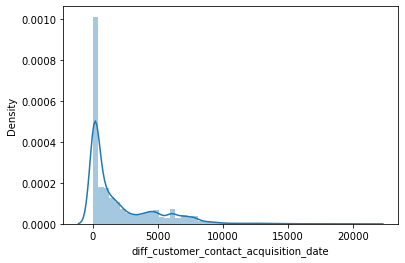

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(d_data18['diff_customer_contact_acquisition_date'])
plt.show()


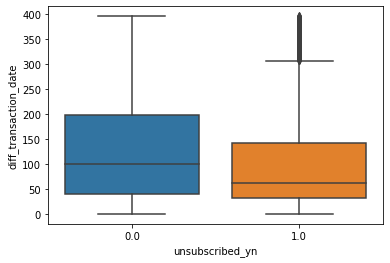

In [42]:
#from the last transaction
sns.boxplot(x = 'unsubscribed_yn',y = 'diff_transaction_date',data = d_data18)
plt.show()


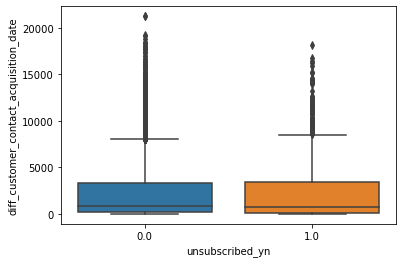

In [43]:
#begining of the account
sns.boxplot(x = 'unsubscribed_yn',y = 'diff_customer_contact_acquisition_date',data = d_data18)
plt.show()

In [44]:
d_data18.loc[d_data18.household_has_dillards_credit_card=='N','household_has_dillards_credit_card'] = 0 
d_data18.loc[d_data18.household_has_dillards_credit_card=='Y','household_has_dillards_credit_card'] = 1

In [45]:
d_data18['household_has_dillards_credit_card']=pd.to_numeric(d_data18['household_has_dillards_credit_card']).astype(float)
d_data18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             25000 non-null  int64  
 1   household_has_dillards_credit_card      25000 non-null  float64
 2   household_distance_to_nearest_store     25000 non-null  float64
 3   diff_customer_contact_acquisition_date  25000 non-null  int64  
 4   unsubscribed_yn                         25000 non-null  float64
 5   netSpend                                25000 non-null  float64
 6   store_location_id                       25000 non-null  float64
 7   item_id                                 25000 non-null  float64
 8   dept                                    25000 non-null  float64
 9   deptdec                                 25000 non-null  float64
 10  city                                    25000 non-null  fl

In [46]:
from sklearn.preprocessing import StandardScaler
#d_data20 = StandardScaler().fit_transform(d_data18)
d_data20 = pd.DataFrame(StandardScaler().fit_transform(d_data18), columns=d_data18.columns, index=d_data18.index)

In [47]:
d_data20.corr()

,customer_id,household_has_dillards_credit_card,household_distance_to_nearest_store,diff_customer_contact_acquisition_date,unsubscribed_yn,netSpend,store_location_id,item_id,dept,deptdec,...,total_email_open_count,total_email_click_count,product_email_sent_count,product_email_open_count,product_email_click_count,sale_email_sent_count,sale_email_open_count,sale_email_click_count,diff_last_email_open_date,diff_last_email_click_date
customer_id,1.000000,-0.353933,0.021575,-0.935250,0.000002,-0.201701,-0.222808,-0.191112,-0.223433,-0.243701,...,-0.040903,-0.016771,-0.027123,-0.038336,-0.017099,-0.022548,-0.031206,-0.012471,-0.013800,-0.022822
household_has_dillards_credit_card,-0.353933,1.000000,-0.032298,0.387143,-0.045512,0.276329,0.221879,0.298882,0.335376,0.352291,...,0.022004,0.007576,0.013325,0.019417,0.007646,0.025485,0.026669,0.004913,-0.004493,0.009557
household_distance_to_nearest_store,0.021575,-0.032298,1.000000,-0.021860,0.020442,-0.022308,-0.038103,-0.033858,-0.040964,-0.046340,...,-0.005410,0.002609,-0.004985,-0.005220,0.002412,0.004810,-0.004289,0.001947,0.002594,-0.001941
diff_customer_contact_acquisition_date,-0.935250,0.387143,-0.021860,1.000000,-0.008101,0.211343,0.230326,0.203342,0.236935,0.257673,...,0.042573,0.018080,0.028401,0.040065,0.017273,0.022968,0.033943,0.017209,0.014391,0.021245
unsubscribed_yn,0.000002,-0.045512,0.020442,-0.008101,1.000000,0.024695,0.001626,-0.006833,-0.006333,-0.006425,...,0.188844,0.094618,0.288608,0.183460,0.089358,0.307966,0.192161,0.086053,0.283430,0.174142
netSpend,-0.201701,0.276329,-0.022308,0.211343,0.024695,1.000000,0.518808,0.833105,0.805740,0.768669,...,0.060064,0.025709,0.061411,0.058522,0.027277,0.034289,0.033744,0.006503,0.031821,0.035008
store_location_id,-0.222808,0.221879,-0.038103,0.230326,0.001626,0.518808,1.000000,0.492498,0.553144,0.603236,...,0.049909,0.023152,0.056542,0.048579,0.024494,0.029019,0.030051,0.012005,0.023829,0.021656
item_id,-0.191112,0.298882,-0.033858,0.203342,-0.006833,0.833105,0.492498,1.000000,0.924215,0.855328,...,0.044211,0.021044,0.044787,0.042804,0.021967,0.017589,0.018940,0.006675,0.013930,0.022486
dept,-0.223433,0.335376,-0.040964,0.236935,-0.006333,0.805740,0.553144,0.924215,1.000000,0.965136,...,0.046512,0.024718,0.054991,0.045436,0.025337,0.020763,0.019065,0.011104,0.015785,0.025194
deptdec,-0.243701,0.352291,-0.046340,0.257673,-0.006425,0.768669,0.603236,0.855328,0.965136,1.000000,...,0.053216,0.030331,0.062089,0.052483,0.031135,0.024369,0.023838,0.013919,0.017948,0.027893


<AxesSubplot:>

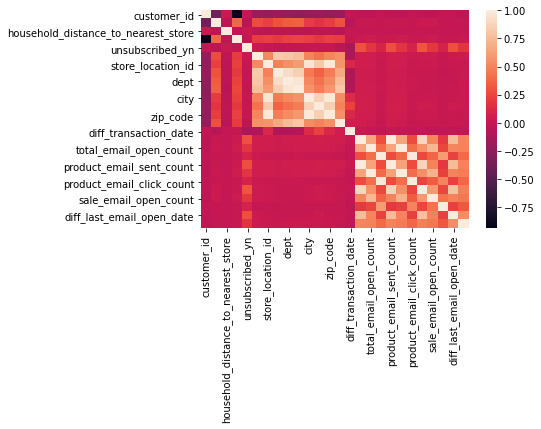

In [48]:
sns.heatmap(d_data20.corr())

In [49]:
X=d_data18.drop(['unsubscribed_yn'],axis=1)
y=d_data18['unsubscribed_yn']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [51]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
  
# Instantiate the classifier
clf1 = RandomForestClassifier()
  
# Fit to the training data
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Predict the labels for the test set
y_pred = clf1.predict(X_test)

In [53]:
# Compute accuracy
from sklearn.metrics import accuracy_score
  
accuracy_score(y_test, y_pred)

0.8233333333333334

In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[5789  222]
 [1103  386]]


In [55]:
TP = 253
TN = 3912
FP = 140
FN = 695
Precision = TP/(TP+FP) 
Recall = TP/(TP+FN) 
Accuracy = (TP+TN)/(TP+TN+FP+FN) 
print(Precision,Recall,Accuracy )

0.6437659033078881 0.2668776371308017 0.833


In [56]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.predict(X_test)
svc.score(X_test, y_test)


0.8014666666666667

In [57]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.8014666666666667

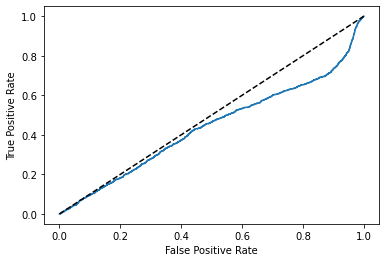

In [58]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

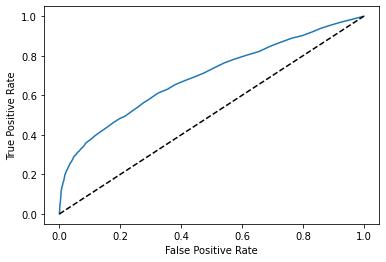

In [59]:
# Generate the probabilities
y_pred_prob = clf1.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf4 = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [62]:
clf4.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [63]:
clf4.best_params_
#{'max_depth': 20, 'n_estimators': 150}
clf4.best_score_


0.8292400000000001

In [67]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled =scaler.transform(X)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [71]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.822
Accuracy score (validation): 0.828

Learning rate:  0.1
Accuracy score (training): 0.826
Accuracy score (validation): 0.832

Learning rate:  0.25
Accuracy score (training): 0.826
Accuracy score (validation): 0.833

Learning rate:  0.5
Accuracy score (training): 0.827
Accuracy score (validation): 0.836

Learning rate:  0.75
Accuracy score (training): 0.831
Accuracy score (validation): 0.838

Learning rate:  1
Accuracy score (training): 0.830
Accuracy score (validation): 0.837

